<a href="https://colab.research.google.com/github/lucas-fpaiva/AnalisePred_I/blob/main/Projeto/car_eval/eda_car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

# Análise Exploratória dos dados


In [41]:
import pandas as pd
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns

from scipy.io.arff import loadarff 
from scipy.io import arff

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import precision_score as ps
from sklearn.metrics import recall_score as rs
from sklearn.metrics import f1_score as f1
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import auc, roc_auc_score


from sklearn.metrics import plot_confusion_matrix

from sklearn.datasets import make_classification
from ast import literal_eval

import warnings
warnings.filterwarnings('ignore')


In [ ]:
def data_k_fold(data, k, tag, id_tag, features):
    kf=StratifiedKFold(n_splits=k, shuffle=True, random_state=123)
    kf.get_n_splits(data[tag].values)
    ids = np.array(data[id_tag])
    folds = pd.DataFrame([], columns=[id_tag, 'fold'])
    k=1
    
    for train_index, test_index in kf.split(data[features], data[tag]):
      fold = np.array([k]*len(test_index))
      folds = pd.concat([folds, pd.DataFrame(np.transpose([ids[test_index],fold]),columns=[id_tag, 'fold'])])
      k+=1

    data = data.merge(folds, how='left',on=id_tag)   
    return data

## Lendo o Dataset

In [ ]:
!git clone 'https://github.com/lucas-fpaiva/AnalisePred_I.git'

Cloning into 'AnalisePred_I'...
remote: Enumerating objects: 205, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 205 (delta 24), reused 0 (delta 0), pack-reused 148
Receiving objects: 100% (205/205), 5.80 MiB | 16.60 MiB/s, done.
Resolving deltas: 100% (70/70), done.


In [ ]:
data = loadarff('/content/AnalisePred_I/Projeto/car_eval/car-evaluation.arff')
data = pd.DataFrame(data[0])

# Convertendo os valores em bytes para int
for col in data.columns:
    data[col] = data[col].astype(int)

data['id'] = data.index
features = data.columns[1:-1]
data = data_k_fold(data, 5, 'class', 'id', features)


In [ ]:
data.to_csv("data_processed.csv")

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/lucas-fpaiva/AnalisePred_I/main/Projeto/car_eval/data_processed.csv', index_col=0)
features = data.columns[1:-1]

In [130]:
data.columns

Index(['class', 'buying_price_vhigh', 'buying_price_high', 'buying_price_med',
       'buying_price_low', 'maintenance_price_vhigh', 'maintenance_price_high',
       'maintenance_price_med', 'maintenance_price_low', 'doors_2', 'doors_3',
       'doors_4', 'doors_5more', 'persons_2', 'persons_4', 'persons_more',
       'luggage_boot_size_small', 'luggage_boot_size_med',
       'luggage_boot_size_big', 'safety_low', 'safety_med', 'safety_high',
       'id', 'fold'],
      dtype='object')

In [76]:
display(data)

,class,buying_price_vhigh,buying_price_high,buying_price_med,buying_price_low,maintenance_price_vhigh,maintenance_price_high,maintenance_price_med,maintenance_price_low,doors_2,...,persons_4,persons_more,luggage_boot_size_small,luggage_boot_size_med,luggage_boot_size_big,safety_low,safety_med,safety_high,id,fold
0,0,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,5
1,0,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,1,5
2,0,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,2,5
3,0,1,0,0,0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,3,4
4,0,1,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,3,0,0,0,1,0,0,0,1,0,...,0,1,0,1,0,0,1,0,1723,4
1724,2,0,0,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,1,1724,1
1725,0,0,0,0,1,0,0,0,1,0,...,0,1,0,0,1,1,0,0,1725,5
1726,3,0,0,0,1,0,0,0,1,0,...,0,1,0,0,1,0,1,0,1726,4


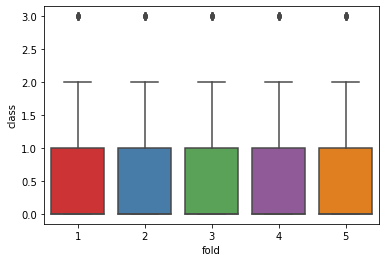

In [43]:
# Distribuição dos folds
sns.boxplot(data = data, y='class',x='fold',palette='Set1')

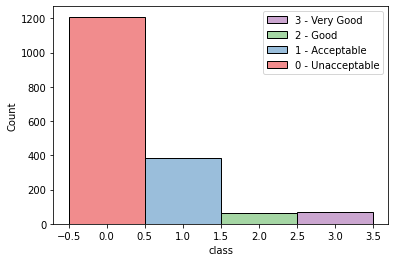

In [48]:
# Ocorrência por classe
labels = ["3 - Very Good", "2 - Good", "1 - Acceptable", "0 - Unacceptable"]
sns.histplot(data=data, x='class', hue='class', palette='Set1', discrete=True)
plt.legend(labels=labels)

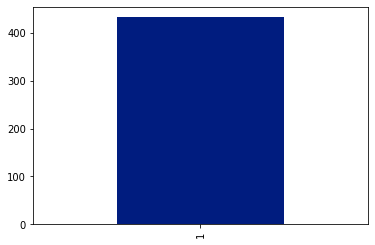

doors_2  doors_4  doors_5more
0        0        0              432
                  1              432
         1        0              432
1        0        0              432
dtype: int64

In [131]:
# Ocorrência por feature
labels = ["3 - Very Good", "2 - Good", "1 - Acceptable", "0 - Unacceptable"]
# print(data[data['buying_price_vhigh']==1]['buying_price_vhigh'].count())
# print(data[data['buying_price_high']==1]['buying_price_high'].count())
# print(data[data['buying_price_med']==1]['buying_price_med'].count())
# print(data[data['buying_price_low']==1]['buying_price_low'].count())

sns.set_palette('dark')
data[data['buying_price_low']==1]['buying_price_low'].value_counts().plot.bar()
plt.show()


data.value_counts(subset=['doors_2', 'doors_4', 'doors_5more'])
#sns.histplot(data=data, x='buying_price_vhigh', 'buying_price_high', palette='Set1')
#plt.legend(labels=labels)